In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
dt = pd.read_excel('unemployment.xlsx')
print(dt)

   State             Area_name  y2007  y2008  y2009  y2010  y2011  y2012  \
0     US         United States    4.6    5.8    9.3   9.63   8.95   8.07   
1     AL               Alabama    4.0    5.7   11.0  10.50   9.60   8.00   
2     AK                Alaska    6.3    6.7    7.7   7.90   7.60   7.10   
3     AZ               Arizona    3.9    6.2    9.9  10.40   9.50   8.30   
4     AR              Arkansas    5.3    5.5    7.8   8.20   8.30   7.60   
5     CA            California    5.4    7.3   11.2  12.20  11.70  10.40   
6     Co              Colorado    3.7    4.8    7.3   8.70   8.40   7.90   
7     DE              Delaware    3.4    4.9    8.3   8.40   7.50   7.20   
8     DC  District of Columbia    5.5    6.5    9.3   9.40  10.20   9.00   
9     FL               Florida    4.0    6.3   10.4  11.10  10.00   8.50   
10    GA               Georgia    4.5    6.2    9.9  10.50  10.20   9.20   
11    HI                Hawaii    2.8    4.3    7.2   6.90   6.80   6.00   
12    ID    

In [9]:
#Reshape the data
d = pd.melt(dt,id_vars=['State','Area_name'],var_name='yr',value_name='unemp')

#Rename a column
d.columns=["st","area","yr","unemp"]

In [10]:
# Remove the 'y' prefix from the 'yr' column
d['yr']= d['yr'].str.replace('y','')

#Sort the data frame
d = d.sort_values(by=["st","area","yr"])

In [11]:
print(d)

     st     area    yr  unemp
2    AK   Alaska  2007    6.3
42   AK   Alaska  2008    6.7
82   AK   Alaska  2009    7.7
122  AK   Alaska  2010    7.9
162  AK   Alaska  2011    7.6
..   ..      ...   ...    ...
319  VT  Vermont  2014    3.9
359  VT  Vermont  2015    3.6
399  VT  Vermont  2016    3.2
439  VT  Vermont  2017    3.0
479  VT  Vermont  2018    2.7

[480 rows x 4 columns]


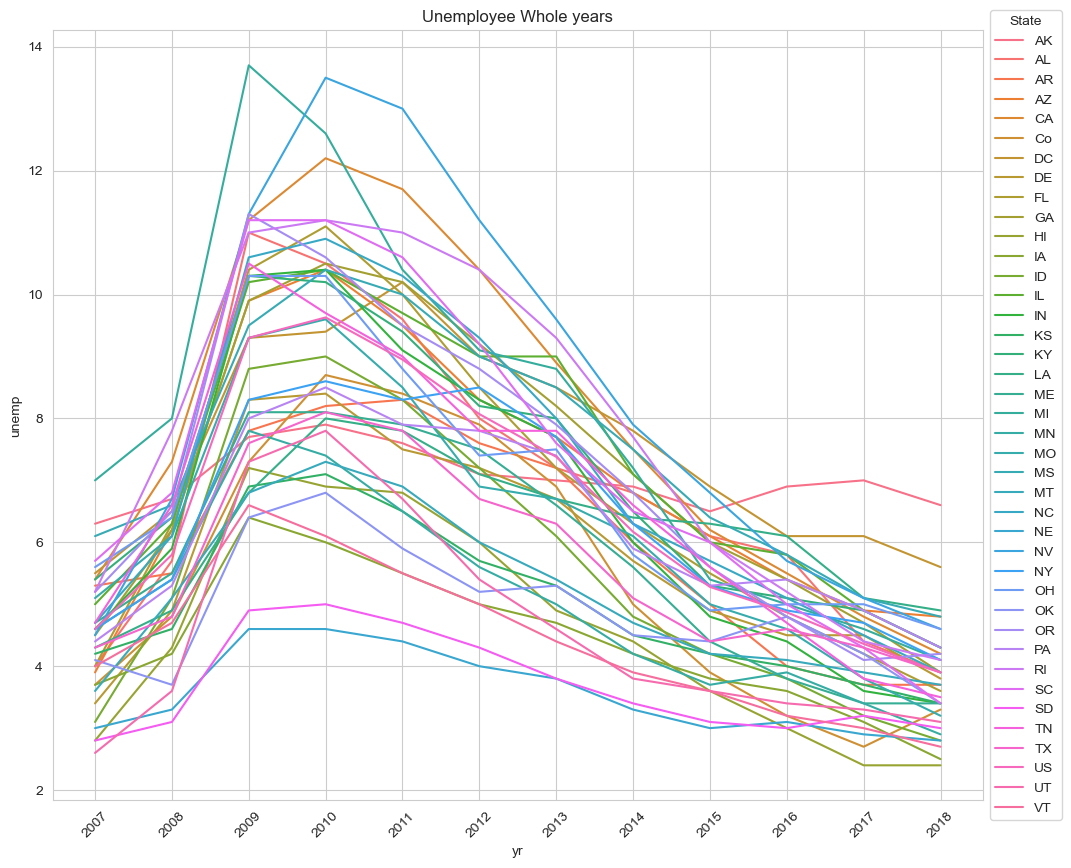

In [35]:
# Visualization Optical
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
sns.lineplot(data=d,x='yr',y='unemp',hue='st',markers='')
plt.xticks(rotation=45)
plt.title('Unemployee Whole years')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='State')
plt.show()

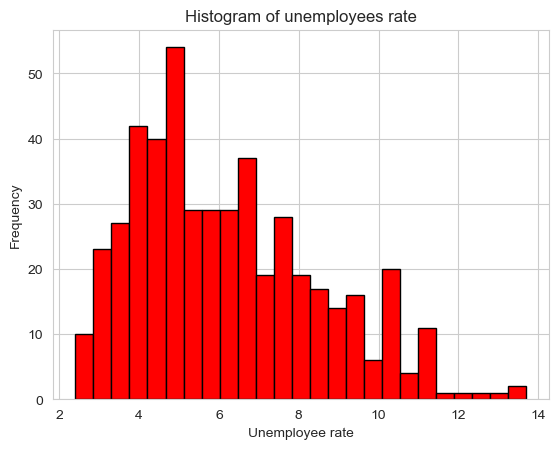

In [41]:
plt.hist(d['unemp'],bins=25,color='red',edgecolor='black')
plt.title('Histogram of unemployees rate')
plt.xlabel("Unemployee rate")
plt.ylabel("Frequency")
plt.show()

In [42]:
# Compute the log10 of the 'unemp' column and store it in a new column
d['unemp_1'] = np.log10(d['unemp'])

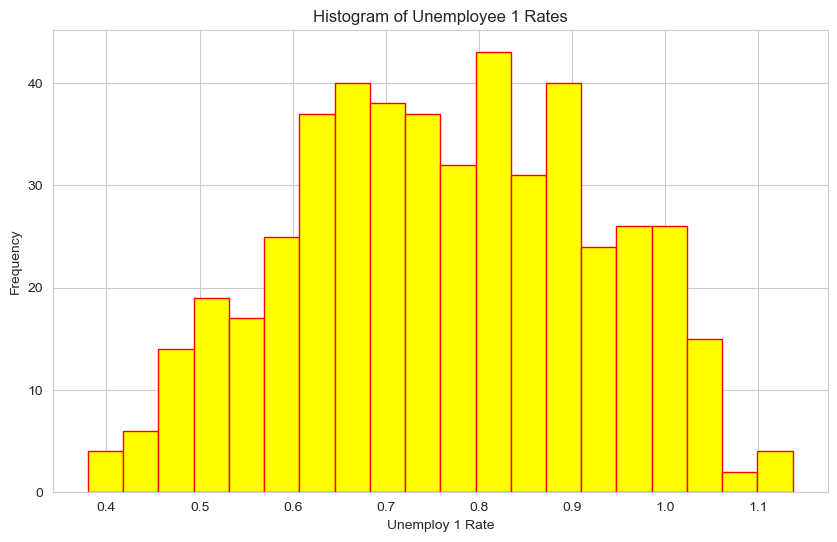

In [58]:
# Create a histogram of the 'unemp_1' column
# plt.subplot(1,2,1)
plt.figure(figsize=(10,6))
plt.hist(d['unemp_1'],bins=20, color='yellow',edgecolor='red')
plt.title('Histogram of Unemployee 1 Rates')
plt.xlabel('Unemploy 1 Rate')
plt.ylabel('Frequency')
plt.show()

In [59]:
# Calculate the mean unemployment rate by state
zz = d.groupby('st')['unemp'].mean()
# Convert the Series to a DataFrame
zz = zz.reset_index(name='mean_unemp')
print(zz)

    st  mean_unemp
0   AK    7.016667
1   AL    6.916667
2   AR    6.025000
3   AZ    6.991667
4   CA    7.941667
5   Co    5.483333
6   DC    7.575000
7   DE    5.816667
8   FL    6.825000
9   GA    7.150000
10  HI    4.558333
11  IA    4.391667
12  ID    5.533333
13  IL    7.308333
14  IN    6.541667
15  KS    5.008333
16  KY    7.000000
17  LA    6.200000
18  ME    5.750000
19  MI    7.991667
20  MN    5.033333
21  MO    6.241667
22  MS    7.475000
23  MT    5.141667
24  NC    7.116667
25  NE    3.566667
26  NV    8.325000
27  NY    6.391667
28  OH    6.800000
29  OK    4.891667
30  OR    7.108333
31  PA    6.258333
32  RI    7.775000
33  SC    7.291667
34  SD    3.691667
35  TN    6.691667
36  TX    5.658333
37  US    6.525833
38  UT    4.600000
39  VT    4.391667


In [62]:
# Find the state with the minimum mean unemployment rate
mx = zz['mean_unemp'].min()
print(mx)
# Find the state with the maximum mean unemployment rate
mx = zz['mean_unemp'].max()
print(zz[zz['mean_unemp']==mx])

3.5666666666666664
    st  mean_unemp
26  NV       8.325


<Axes: xlabel='st', ylabel='mean_unemp'>

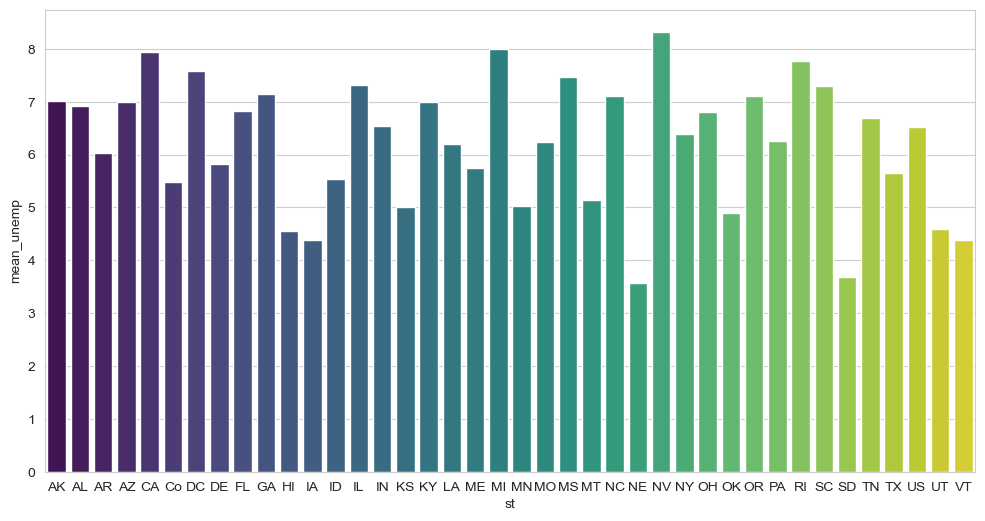

In [65]:
# Plot the mean unemployment rates by state
plt.figure(figsize=(12,6))
sns.barplot(x='st',y='mean_unemp',data=zz,palette='viridis')


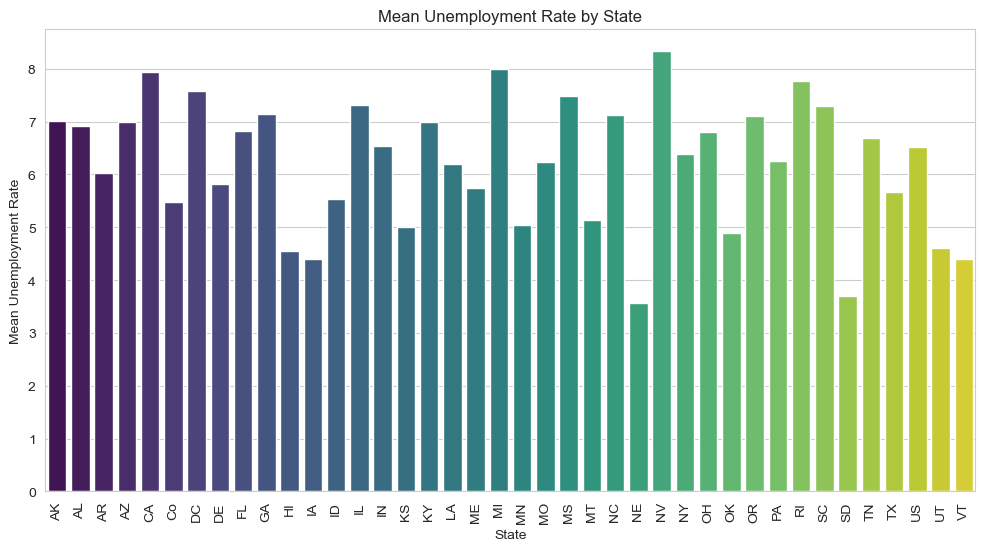

    count      mean       std  min     25%    50%     75%    max
st                                                              
AK   12.0  7.016667  0.493288  6.3  6.6750  6.950   7.225   7.90
AL   12.0  6.916667  2.436776  3.9  5.3750  6.450   8.400  11.00
AR   12.0  6.025000  1.749870  3.7  4.7500  5.750   7.650   8.30
AZ   12.0  6.991667  2.159738  3.9  5.2750  6.500   8.600  10.40
CA   12.0  7.941667  2.856717  4.2  5.4750  7.400  10.600  12.20
Co   12.0  5.483333  2.218039  2.7  3.6000  4.900   7.450   8.70
DC   12.0  7.575000  1.659751  5.5  6.1000  7.350   9.075  10.20
DE   12.0  5.816667  1.743473  3.4  4.5000  5.300   7.275   8.40
FL   12.0  6.825000  2.624405  3.6  4.6500  6.300   8.875  11.10
GA   12.0  7.150000  2.379267  3.9  5.2250  6.650   9.375  10.50
HI   12.0  4.558333  1.797199  2.4  2.9500  4.350   6.200   7.20
IA   12.0  4.391667  1.171214  2.5  3.6750  4.200   5.125   6.40
ID   12.0  5.533333  2.292015  2.8  3.6500  4.950   7.475   9.00
IL   12.0  7.308333  2.22

In [68]:
plt.figure(figsize=(12,6))
sns.barplot(x='st',y='mean_unemp',data=zz,palette='viridis')
plt.title("Mean Unemployment Rate by State")
plt.xlabel("State")
plt.ylabel("Mean Unemployment Rate")
plt.xticks(rotation=90)
plt.show()
# Summary statistics of 'unemp' by state
summary = d.groupby('st')['unemp'].describe()
print(summary)

In [69]:
d.to_csv('unemployment.csv',index=False)

In [70]:
dt = pd.read_excel('child140_practice.xlsx')
print(dt)

    stu_prenme  stu_brtdte  stu_sex  stu_birth_weight  stu_stature  \
0         ด.ช.    25610303        1              2890         87.0   
1         ด.ช.    25610403        1              3760         85.0   
2         ด.ช.    25610314        1              2920          0.0   
3         ด.ญ.    25600527        2              3110         90.0   
4         ด.ช.    25610507        1              3310         90.0   
..         ...         ...      ...               ...          ...   
135       ด.ญ.    25600929        2              2770         93.0   
136       ด.ช.    25601127        1              3290        100.0   
137       ด.ช.    25610218        1              2970         90.0   
138       ด.ช.    25610505        1              1920         90.0   
139       ด.ญ.    25610427        2              3218         91.0   

     stu_weight  qtn_siblings_faandmom  qtn_childno               stsmarnme  \
0          10.0                    2.0          2.0  สมรส/มีคู่/อยู่ด้วยกัน   
1

In [78]:
# Convert 'stu_brtdte' to a datetime object
dt['stubrtdte'] = pd.to_datetime(dt['stu_brtdte'], format='%Y%m%d',errors='coerce')
# Define today's date using the Buddhist calendar year (2567 corresponds to 2024 in the Gregorian calendar)
today = pd.to_datetime("25670707",format='%Y%m%d',errors='coerce')-pd.DateOffset(year=543)

# Calculate the age in years, months, and days
dt['stuage'] = (today-dt['stubrtdte']).dt.days/365.25

# Display the structure of the dataframe
print(dt)


    stu_prenme  stu_brtdte  stu_sex  stu_birth_weight  stu_stature  \
0         ด.ช.    25610303        1              2890         87.0   
1         ด.ช.    25610403        1              3760         85.0   
2         ด.ช.    25610314        1              2920          0.0   
3         ด.ญ.    25600527        2              3110         90.0   
4         ด.ช.    25610507        1              3310         90.0   
..         ...         ...      ...               ...          ...   
135       ด.ญ.    25600929        2              2770         93.0   
136       ด.ช.    25601127        1              3290        100.0   
137       ด.ช.    25610218        1              2970         90.0   
138       ด.ช.    25610505        1              1920         90.0   
139       ด.ญ.    25610427        2              3218         91.0   

     stu_weight  qtn_siblings_faandmom  qtn_childno               stsmarnme  \
0          10.0                    2.0          2.0  สมรส/มีคู่/อยู่ด้วยกัน   
1

In [79]:
# Summary of 'stuage' columns
print(dt['stuage'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: stuage, dtype: float64


In [88]:
dt['fabrtdte'] = pd.to_datetime(dt['brtdte'],format='%Y%m%d',errors='coerce')-pd.DateOffset(years=543)
# calculate age and store it in a new column 'faage'
dt['faage'] = (today-dt['fabrtdte']).dt.days/365.25
print(dt)
# Summary of 'faage' columns
print(dt['faage'].describe())

    stu_prenme  stu_brtdte  stu_sex  stu_birth_weight  stu_stature  \
0         ด.ช.    25610303        1              2890         87.0   
1         ด.ช.    25610403        1              3760         85.0   
2         ด.ช.    25610314        1              2920          0.0   
3         ด.ญ.    25600527        2              3110         90.0   
4         ด.ช.    25610507        1              3310         90.0   
..         ...         ...      ...               ...          ...   
135       ด.ญ.    25600929        2              2770         93.0   
136       ด.ช.    25601127        1              3290        100.0   
137       ด.ช.    25610218        1              2970         90.0   
138       ด.ช.    25610505        1              1920         90.0   
139       ด.ญ.    25610427        2              3218         91.0   

     stu_weight  qtn_siblings_faandmom  qtn_childno               stsmarnme  \
0          10.0                    2.0          2.0  สมรส/มีคู่/อยู่ด้วยกัน   
1

In [92]:
dt['mombrtdte'] = pd.to_datetime(dt['brtdte2'],format='%Y%m%d',errors='coerce')
dt['momage'] = (today- dt['mombrtdte']).dt.days/365.25
print(dt['momage'].describe())


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: momage, dtype: float64


c:\Users\Dell PC\anaconda3\Lib\site-packages\pandas\core\tools\datetimes.py:1256: RuntimeWarning: invalid value encountered in cast
  masked_result = calc(carg[mask].astype(np.float64).astype(np.int64))


In [93]:
negative_momage = dt[dt['momage']<0]
print(negative_momage)
# Repalc

Empty DataFrame
Columns: [stu_prenme, stu_brtdte, stu_sex, stu_birth_weight, stu_stature, stu_weight, qtn_siblings_faandmom, qtn_childno, stsmarnme, brtdte, edulevnme1, occnme, sal, brtdte2, edulevnme2, occnme2, sal2, qtn_sp2_1, qtn_sp2_2, qtn_sp2_3, qtn_sp2_4, qtn_sp2_5, qtn_sp2_6, qtn_sp2_7, qtn_sp2_8, qtn_sp2_9, qtn_sp2_10, qtn_sp2_11, qtn_sp2_12, qtn_sp2_13, stubrtdte, stuage, fabrtdte, faage, mombrtdte, momage]
Index: []

[0 rows x 36 columns]


In [96]:
# Replace negative 'momage' values with NaN
dt['momage'] = dt['momage'].apply(lambda x:x if x >=0 else pd.NA)

# Summary of 'momage' columns after replacing negative values
print(dt['momage'].describe())

count       0
unique      0
top       NaN
freq      NaN
Name: momage, dtype: object


In [102]:
dt['faagegrp'] = np.where(dt['faage'].isnull(),4,
                          np.where(dt['faage'] <= 30,1,
                            np.where(dt['faage'] <= 40,2,3)))
print(dt['faagegrp'].value_counts())

4    140
Name: faagegrp, dtype: int64


In [103]:
dt['faagegrp'] = pd.Categorical(dt['faagegrp'], categories=[1, 2, 3, 4], ordered=True)
dt['faagegrp'].cat.categories = ["1:<30", "2:31-40", "3:>40", "4:Underfined"]
print(dt['faagegrp'].value_counts())

4:Underfined    140
1:<30             0
2:31-40           0
3:>40             0
Name: faagegrp, dtype: int64


C:\Users\Dell PC\AppData\Local\Temp\ipykernel_6532\1690195354.py:2: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  dt['faagegrp'].cat.categories = ["1:<30", "2:31-40", "3:>40", "4:Underfined"]


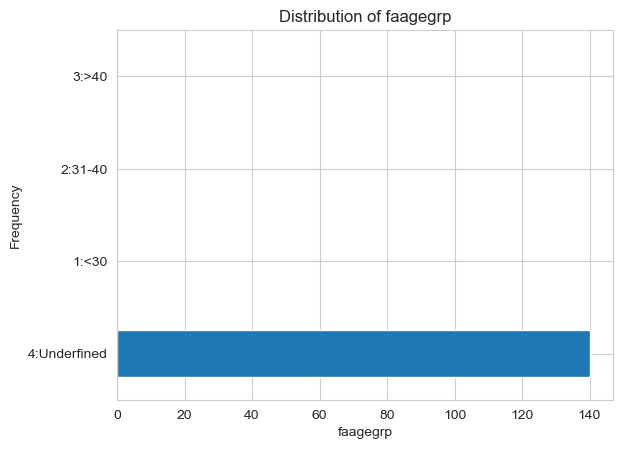

In [109]:

dt['faagegrp'].value_counts().plot(kind='barh')
plt.title('Distribution of faagegrp')
plt.xlabel('faagegrp')
plt.ylabel('Frequency')
plt.show()


In [114]:
dt.groupby('faagegrp')['sal'].describe()

,count,mean,std,min,25%,50%,75%,max
faagegrp,,,,,,,,
1:<30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2:31-40,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3:>40,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4:Underfined,139.0,8594.172662,7365.087728,0.0,5000.0,8000.0,10000.0,47000.0


In [115]:
pd.crosstab(dt['occnme'],dt['faagegrp'])

faagegrp,4:Underfined
occnme,
ข้าราชการ,2
ข้าราชการเกษียณอายุ,1
ค้าขาย/ประกอบธุรกิจส่วนตัว,12
ประมงและการเดินเรือ,5
พนักงานของรัฐ,2
พนักงานรัฐวิสาหกิจ,2
รับจ้างทั่วไป/กรรมกร,50
ลูกจ้างบริษัท/พนักงานเอกชน,1
ลูกจ้างประจำ,5


<Figure size 1200x1000 with 0 Axes>

C:\Users\Dell PC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3586 (\N{THAI CHARACTER KHO KHAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell PC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell PC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell PC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell PC\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3594 (\N{THAI

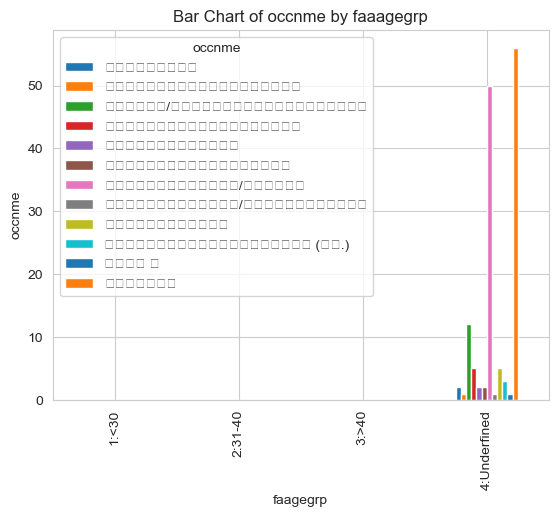

In [126]:
plt.figure(figsize=(12,10))
dt.groupby(['faagegrp','occnme']).size().unstack().plot(kind='bar')
plt.xlabel("faagegrp")
plt.ylabel("occnme")
plt.title("Bar Chart of occnme by faaagegrp")
plt.show()

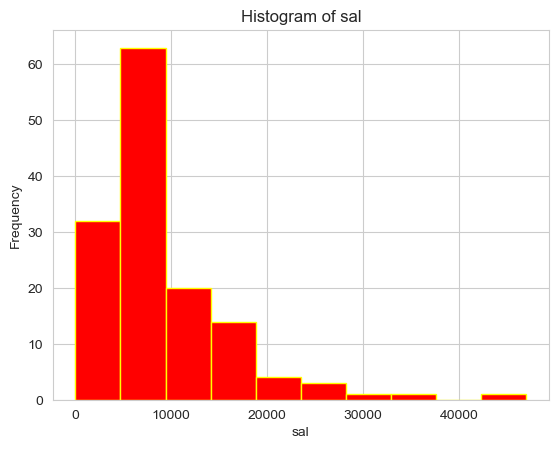

In [131]:
dt['sal'].plot(kind='hist',color='red',alpha=1,edgecolor='yellow')
plt.xlabel('sal')
plt.ylabel('Frequency')
plt.title("Histogram of sal")
plt.show()

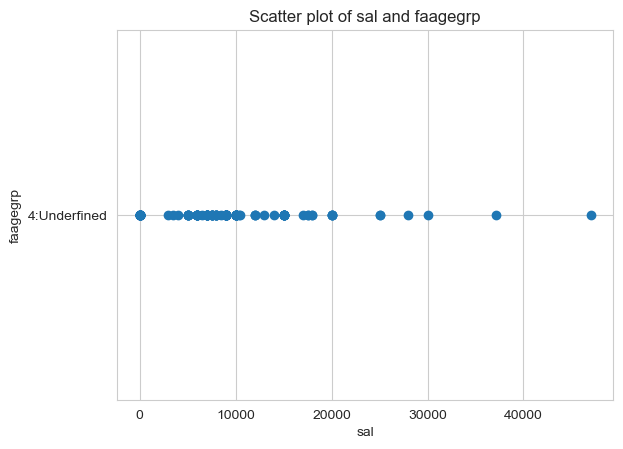

In [132]:
plt.scatter(dt['sal'],dt['faagegrp'])
plt.xlabel('sal')
plt.ylabel('faagegrp')
plt.title("Scatter plot of sal and faagegrp")
plt.show()